In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dataset = pd.read_csv('F:\DESKTOP FOLDERS\FULL MACHINE LEARNING\Machine Learning-A-Z-Codes-Datasets\Machine Learning A-Z (Codes and Datasets)\Part 2 - Regression\Section 6 - Polynomial Regression\Python\Position_Salaries.csv')

In [3]:
print(dataset)

            Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000


In [7]:
X = dataset.iloc[:,1:-1].values  #we will only take one column as there is a polynomial relation
#as the postion level the salary of the persons also increases 
y = dataset.iloc[:,-1].values

In [8]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [6]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [10]:
#Training the Linear Regression Model
from sklearn.linear_model import LinearRegression
lin_regressor = LinearRegression()

lin_regressor.fit(X, y)

LinearRegression()

In [22]:
#training the Polynomial regression Model
#build a matrix conatining features at different powers

from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4, include_bias = False)  #include biases -> to not have an extra 1's columns
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly,y)

LinearRegression()

In [23]:
print(X_poly)

[[1.000e+00 1.000e+00 1.000e+00 1.000e+00]
 [2.000e+00 4.000e+00 8.000e+00 1.600e+01]
 [3.000e+00 9.000e+00 2.700e+01 8.100e+01]
 [4.000e+00 1.600e+01 6.400e+01 2.560e+02]
 [5.000e+00 2.500e+01 1.250e+02 6.250e+02]
 [6.000e+00 3.600e+01 2.160e+02 1.296e+03]
 [7.000e+00 4.900e+01 3.430e+02 2.401e+03]
 [8.000e+00 6.400e+01 5.120e+02 4.096e+03]
 [9.000e+00 8.100e+01 7.290e+02 6.561e+03]
 [1.000e+01 1.000e+02 1.000e+03 1.000e+04]]


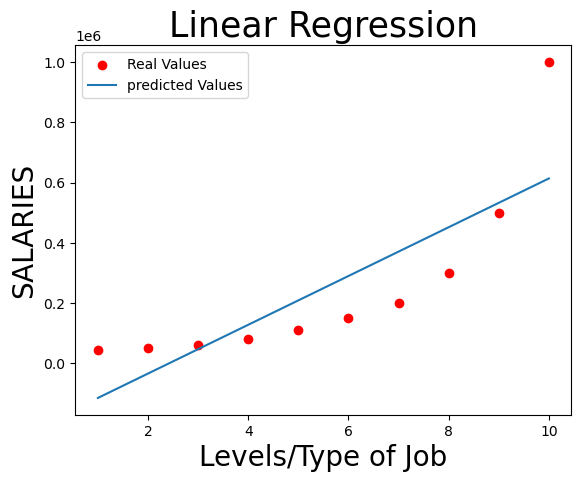

In [19]:
#visualising the linear regression results


plt.scatter(X,y, color = 'red', label = 'Real Values')
# plt.plot(X)
plt.plot(X, lin_regressor.predict(X), label = 'predicted Values')
plt.xlabel('Levels/Type of Job', fontdict = {'fontsize': 20})
plt.ylabel('SALARIES', fontdict = {'fontsize': 20})
plt.title('Linear Regression', fontdict = {'fontsize': 25})
plt.legend()

plt.show()

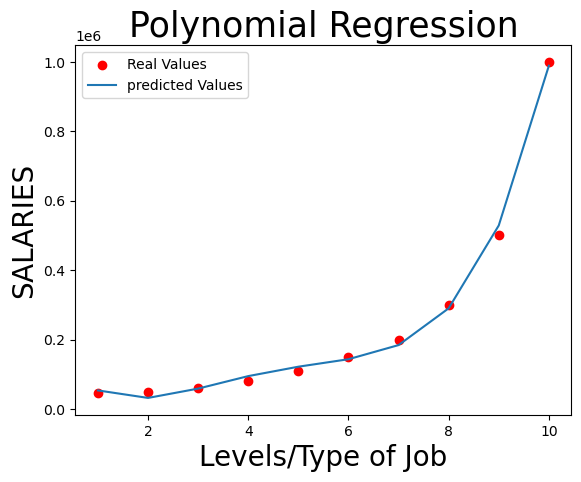

In [24]:
#visualising the Polynomial  regression results

plt.scatter(X,y, color = 'red', label = 'Real Values')
plt.plot(X, lin_reg_2.predict(X_poly), label = 'predicted Values')
plt.xlabel('Levels/Type of Job', fontdict = {'fontsize': 20})
plt.ylabel('SALARIES', fontdict = {'fontsize': 20})
plt.title('Polynomial Regression', fontdict = {'fontsize': 25})
plt.legend()

plt.show()

In [29]:
#predicting a specific salary with Both the models

# lin_regressor.predict(<inanarray>)
# lin_regressor.predict(np.array(6.5).reshape(-1,1))
lin_regressor.predict([[6.5]])

array([330378.78787879])

In [31]:
# lin_reg_2.predict(np.array(6.5).reshape(-1,1))
lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))

array([158862.45265152])